In [1]:
#Packlage imports
import matplotlib.pyplot as plt;
import sklearn;
import sklearn.datasets;
import sklearn.linear_model;
from testCases_v2 import *;
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets;

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

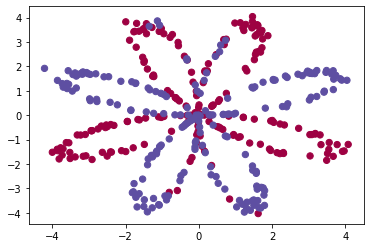

In [2]:
X,Y = load_planar_dataset()
plt.scatter(X[0,:],X[1,:], c = np.squeeze(Y), s= 40, cmap=plt.cm.Spectral);
plt.show()

In [3]:
#Print the shape of the variables X and Y
shape_X = X.shape
shape_Y = Y.shape
m=X.shape[1] #training set size number of examples

print('The shape of X is ' + str(shape_X))
print('The shape of Y is ' + str(shape_Y))
print('I have m = %d training examples!' % (m))

The shape of X is (2, 400)
The shape of Y is (1, 400)
I have m = 400 training examples!


In [4]:
#Start with a logistic regression classifier to see how well it works

#Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, np.squeeze(Y.T))

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47% 


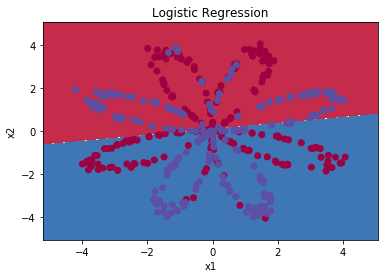

In [5]:
#Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

#Print accuracy
LR_prediction = clf.predict(X.T)
print('Accuracy of logistic regression: %d' % float((np.dot(Y,LR_prediction) + np.dot(1-Y, 1-LR_prediction))/float(Y.size)*100) + '% ' )

In [6]:
#Define the network Structure

def layer_sizes(X,y):
    """
    Arguments:
    X -- input dataset of shape(input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] # size of the input layer
    n_h = 4; # define it as 4
    n_y = Y.shape[0]; #Size of the output layer
    
    return (n_x,n_h,n_y)

In [7]:
#Testing precious layer size function
X_assess, Y_assess= layer_sizes_test_case();
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess);
print("the size of the input layer is: n_x: = " +str(n_x));
print("the size of the hidden layer is: n_h: = " +str(n_h));
print("the size of the output layer is: n_y: = " +str(n_y));

the size of the input layer is: n_x: = 5
the size of the hidden layer is: n_h: = 4
the size of the output layer is: n_y: = 1


In [8]:
#Initialize the models parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Arguments:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                w1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h,1)
                w2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y,1)
    """
    
    #Weights must be randomly initialized for symmetry breaking 
    
    W1 = np.random.rand(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2= np.zeros((n_y, n_h)) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x));
    assert (b1.shape == (n_h, 1));
    assert (W2.shape == (n_y, n_h));
    assert (b2.shape == (n_y, 1));
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                 };
    
    return parameters;
    
    

In [9]:
n_x, n_h, n_y = initialize_parameters_test_case();
parameters = initialize_parameters(n_x, n_h, n_y);
print("W1 = " + str(parameters["W1"]));
print("b1 = " + str(parameters["b1"]));
print("b2 = " + str(parameters["b2"]));
print("W2 = " + str(parameters["W2"]));


W1 = [[0.00686501 0.00834626]
 [0.00018288 0.00750144]
 [0.00988861 0.00748166]
 [0.00280444 0.00789279]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
b2 = [[0.]]
W2 = [[0. 0. 0. 0.]]


In [10]:
#Forward propogation This will use tanh for the hidden layer activation and sigmoid for the output layer activation

def forward_propagation(X, parameters):
    """
    Arguments:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing parameters (output of initialization function) (W1,W2,b1,b2)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary contraining "Z1", "A1", "Z2", "A2"
    """
    
    #Retreieve each parameter from the dictionary "Parameters"
    W1 = parameters["W1"];
    b1 = parameters["b1"];
    W2 = parameters["W2"];
    b2 = parameters["b2"];
    
    
    #Implement Forward Propagation to calculate A2 (probabilities)
    #Goes over each layer to calculate z1,a1,z2,a2
    Z1 = np.dot(W1,X) + b1;
    A1 = np.tanh(Z1);
    Z2 = np.dot(W2, A1)+ b2;
    A2=  sigmoid(Z2);

    
    assert (A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2};
    return A2, cache;

In [11]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters);
#uses mean to make sure outputs match other runs
print("Z1 = " + str(np.mean(cache['Z1'])), "A1 = " + str(np.mean(cache['A1'])),"A2 = " +str(np.mean(cache['A2'])))

Z1 = 0.26281864019752443 A1 = 0.09199904522700109 A2 = 0.21287768171914198


In [12]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parametres W1, b1, W2 and b2
    
    
    Returns:
    cost -- cross-entropy cost given equation
    """
    
    
    #Cross entropy loss is also the same as logloss
    m= Y.shape[1] #shape of the output
    
    #compute the cross-entropy cost Loss equation of sigmoid 
    
    logprobs = np.dot(np.log(A2), Y.T)+ np.dot(np.log(1-A2), (1-Y).T);
    cost = -1.0/ m * logprobs [0][0];
    
    cost = np.squeeze(cost) #makes sure cost is the dimensions we expect
    
    assert(isinstance(cost, float));
    
    return cost;

In [13]:
A2, Y_assess, parameters = compute_cost_test_case();
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [14]:
#Backward propagation for gradients

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions 
    d2,db2,dw2,dz1,dw1,db1 equations

    Arguments -- parameters -- python dictionary contraining our parameters
    cache -- a dictionary contraining "Z1", "A1", "Z2" and "A1"
    X -- input data of shape (2, number of examples) containing Z1 and Z2
    Y -- "true" labels vector of shape (1, number of examples)

    returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    m = X.shape[1]; #number of examples in the input layer
    
    #First, retrieve W1 and W2 from dictionary parameters
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    #retrieve also A1 and A2 from dictionary "cache"
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    #Backward propagation
    dZ2 = A2 - Y;
    dW2 = 1/m*np.dot(dZ2, A1.T);
    db2 = 1/m*np.sum(dZ2, axis = 1, keepdims = True);
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2));
    dW1 = 1/m * np.dot(dZ1,X.T);
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True);
    
    
    #set up a dict
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2};
    return grads;



In [15]:
#test out the backprop function
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [16]:
#Updating the parameters last step in the loop

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    updates the parameters using the gradient descent rules
    
    Arguments:
    parameters -- python dictionary containing the parameters
    grads -- python dictionary containing the gradients
    
    returns:
    parameters -- python dictionary containing your gradients
    """
    
    #retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    #Update rule for each parameter
    W1 = W1 - learning_rate * dW1;
    b1 = b1 - learning_rate * db1;
    W2 = W2 - learning_rate * dW2;
    b2 = b2 - learning_rate * db2;
    
    
    #dictionary for pulling variable later
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2};
    
    return parameters;

In [17]:
parameters, grads = update_parameters_test_case();
parameters = update_parameters(parameters, grads);

print("W1 = " + str(parameters["W1"]));
print("b1 = " + str(parameters["b1"]));
print("W2 = " + str(parameters["W2"]));
print("b2 = " + str(parameters["b2"]));


#this shows the weights of all of the possible connections for W1 i.e columns are the inputs and rows are hidden layer connection per input

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [18]:
#Neural Network Model. This is where it all comes together

def nn_model(X,Y, n_h, num_iterations = 10000, print_cost= False):
    """
    Arguments:
    X -- dataset of shape (2, numbre of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- number of iterations in gradient descent loop
    print_cost -- if true, print the cost every 1000 iterations
    
    
    Returns:
    parameters -- parameters learnt by the model. they can be used to predict
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    #Initialize the parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y" outputs= "W1, b1, W2, b2, parameters"
    parameters =initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    #loop gradient descent
    
    for i in range(0, num_iterations):
        
        #Forward propagation Inputs:"Parameters, cache, X, Y." Outputs: "parameters"
        A2, cache = forward_propagation(X, parameters)
        
        #Cost function. Inputs: "A2, Y, parameters" Outputs: "cost"
        cost= compute_cost(A2, Y, parameters)
        
        #Cost function. Inputs:" parameters, cache, X, Y." Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        
        #Gradient descent parameter update. Inputs: "Paramters, grads." Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        #print every 1000 iterations
        if print_cost and i %1000 ==0:
            print("Cost after iteraion %i: %f" %(i, cost));
            
    return parameters;        

In [19]:
X_assess, Y_assess = nn_model_test_case();
parameters = nn_model(X_assess, Y_assess, 4, num_iterations = 10000, print_cost=True);
print("W1 = " + str(parameters["W1"]));
print("b1 = " + str(parameters["b1"]));
print("W2 = " + str(parameters["W2"]));
print("b2 = " + str(parameters["b2"]));

Cost after iteraion 0: 0.693147
Cost after iteraion 1000: 0.000216
Cost after iteraion 2000: 0.000107
Cost after iteraion 3000: 0.000071
Cost after iteraion 4000: 0.000053
Cost after iteraion 5000: 0.000042
Cost after iteraion 6000: 0.000035
Cost after iteraion 7000: 0.000030
Cost after iteraion 8000: 0.000026
Cost after iteraion 9000: 0.000023
W1 = [[-0.72661149  1.34626168]
 [-0.70740871  1.3099235 ]
 [-0.73399208  1.36248417]
 [-0.60865202  1.13546235]]
b1 = [[0.34575925]
 [0.3324198 ]
 [0.35161027]
 [0.26462926]]
W2 = [[-3.01779374 -2.84849518 -3.09378718 -2.13498319]]
b2 = [[0.22160282]]


In [20]:
#Prediction
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters
    X-- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red:0 / blue:1)
    """
    
    
    #computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    
    A2, cache = forward_propagation(X, parameters);
    predictions = (A2 > 0.5);
    
    return predictions;


In [21]:
parameters, X_assess = predict_test_case();
predictions = predict(parameters, X_assess);
print("predictions mean = " + str(np.mean(predictions)));

predictions mean = 0.6666666666666666


Cost after iteraion 0: 0.693147


Text(0.5, 1.0, 'Decision Boundary for hideen layer size 4')

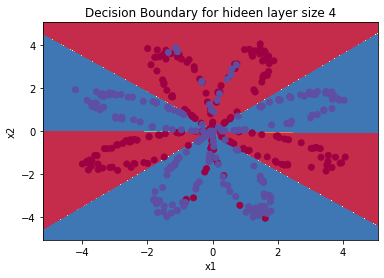

In [22]:
#Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 1000, print_cost=True);

#Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
plt.title("Decision Boundary for hideen layer size " + str(4))

In [23]:
#print accuracy
predictions = predict(parameters, X);
print(('Accuracy: %d ' %(np.mean(Y == predictions) * 100)) + '%')

Accuracy: 89 %


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.5 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.75 %


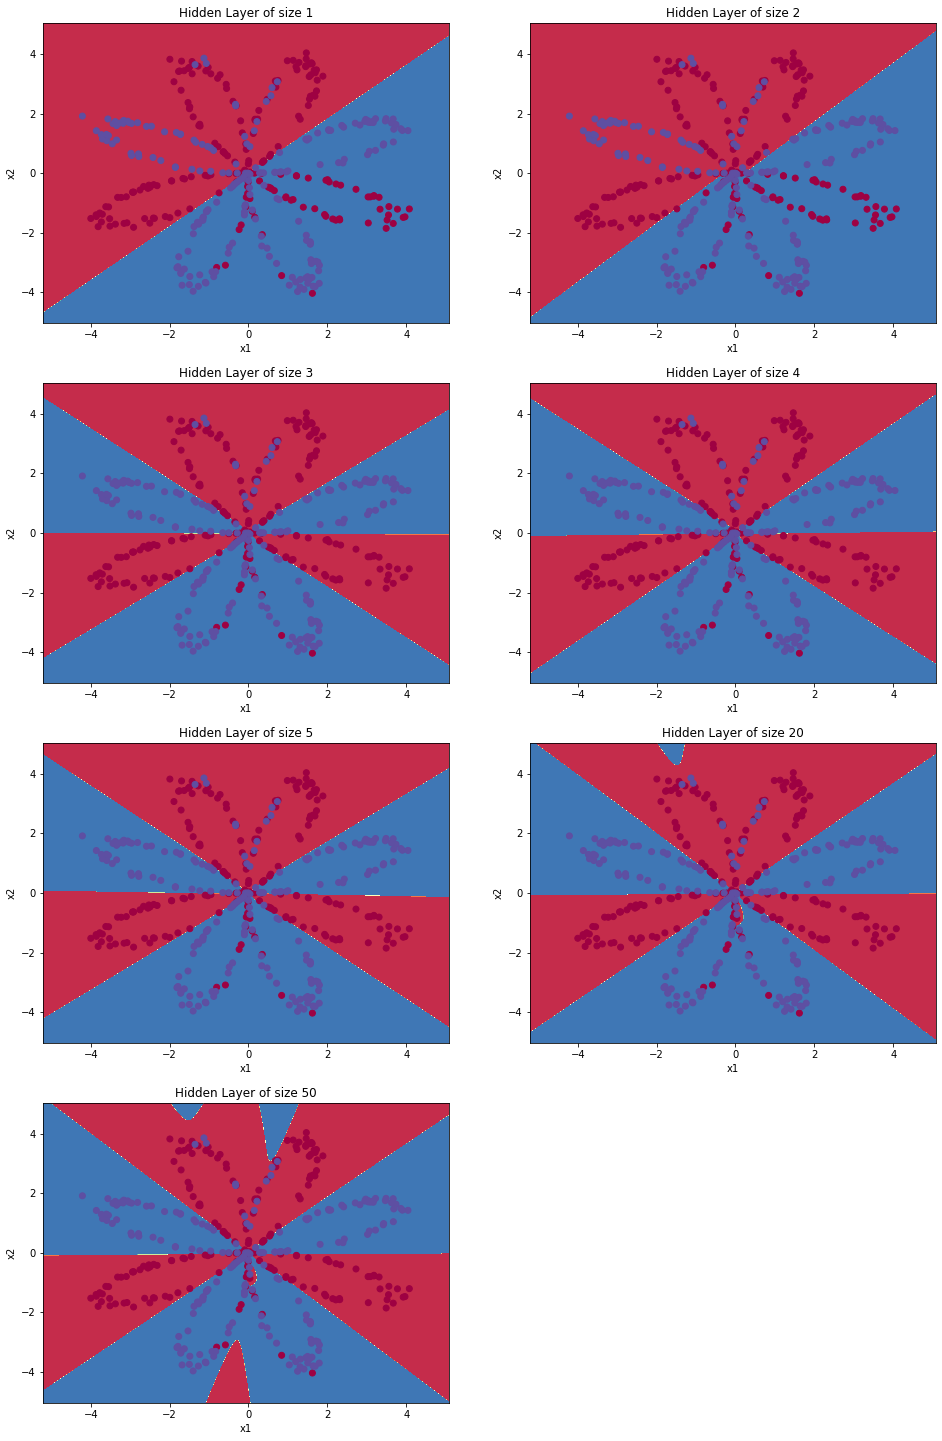

In [24]:
# Tuning hidden layer size

plt.figure(figsize = (16, 32));
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50];
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1);
    plt.title('Hidden Layer of size %d' %n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000);
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
    predictions = predict(parameters, X);
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100);
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [25]:
def load_extra_dataset():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=0.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise =.2)
    blobs = sklearn.dataset.make_blobs(n_samples=N, random_state=5,n_features = 2, centers = 6)
    gaussian_quantiles = sklearn.dataset.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None);
    no_structure = np.random.rand(N, 2), np.random.rand(N,2);
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure;

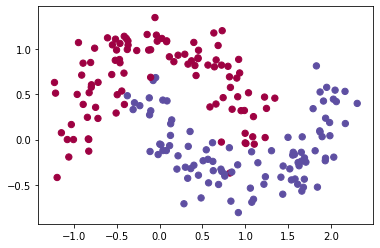

In [26]:
# New Datasets Old stuff is done!
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral);

Cost after iteraion 0: 0.693147


Text(0.5, 1.0, 'Decision Boundary for hideen layer size 4')

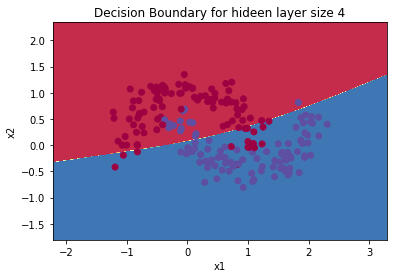

In [27]:
#Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 1000, print_cost=True);

#Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
plt.title("Decision Boundary for hideen layer size " + str(4))  

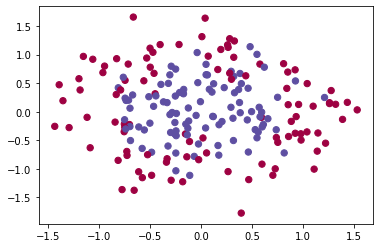

In [28]:
### START CODE HERE ### (choose your dataset)
dataset = "noisy_circles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral);

Accuracy for 1 hidden units: 62.0 %
Accuracy for 2 hidden units: 73.5 %
Accuracy for 3 hidden units: 82.5 %
Accuracy for 4 hidden units: 83.5 %
Accuracy for 5 hidden units: 83.0 %
Accuracy for 20 hidden units: 82.5 %
Accuracy for 50 hidden units: 81.5 %


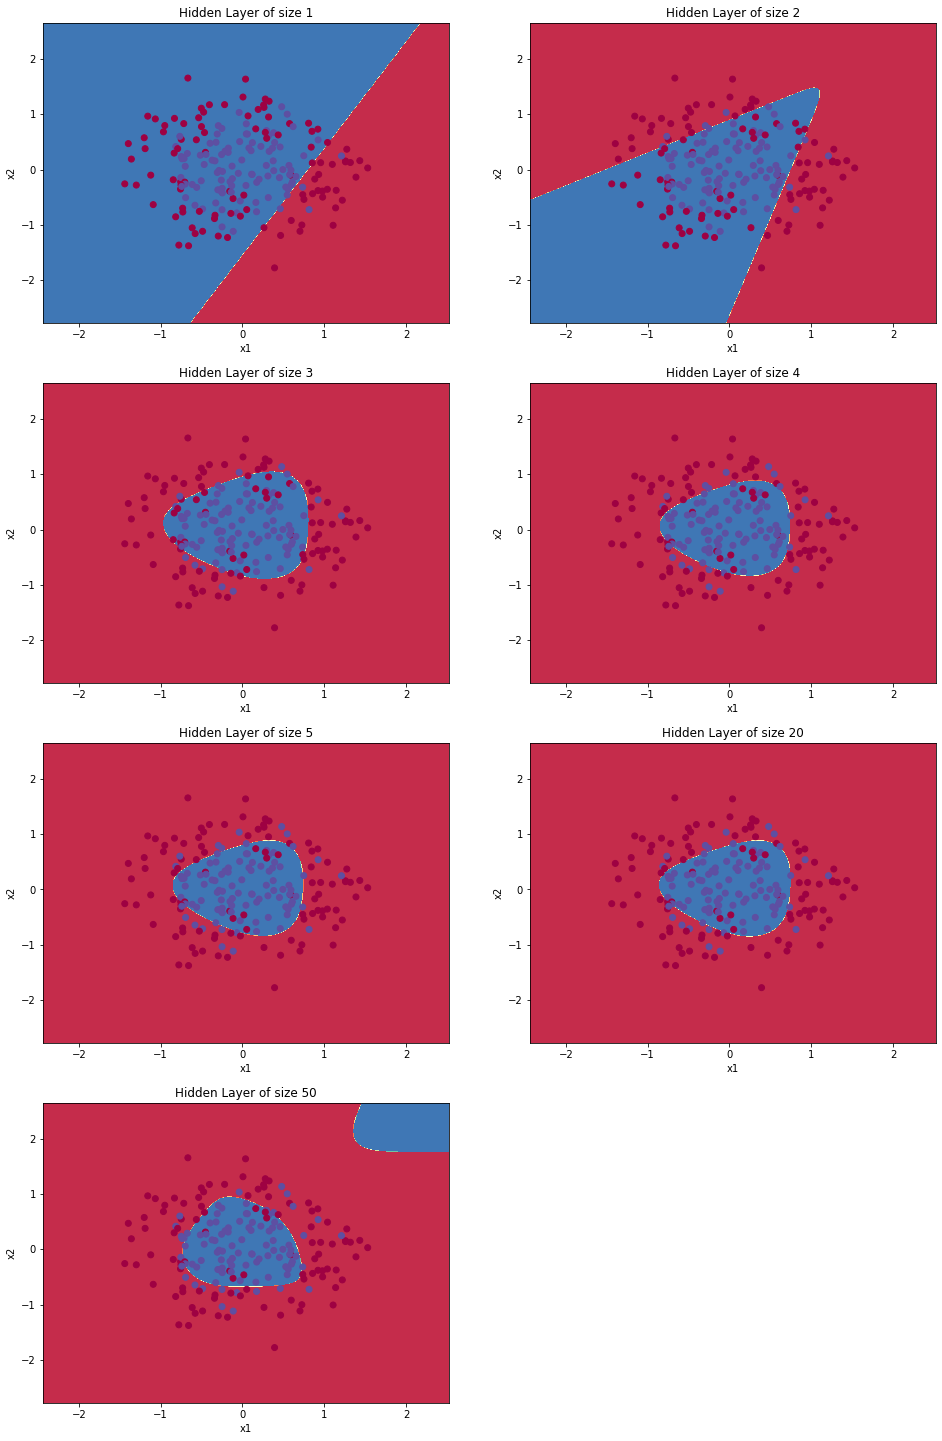

In [29]:
# Tuning hidden layer size

plt.figure(figsize = (16, 32));
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50];
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1);
    plt.title('Hidden Layer of size %d' %n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000);
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
    predictions = predict(parameters, X);
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100);
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Cost after iteraion 0: 0.693147


Text(0.5, 1.0, 'Decision Boundary for hideen layer size 4')

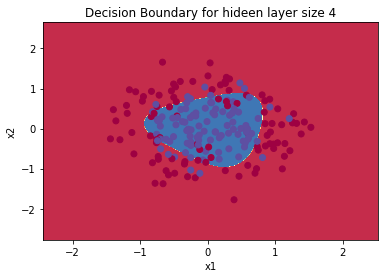

In [30]:
#Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 1000, print_cost=True);

#Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
plt.title("Decision Boundary for hideen layer size " + str(4))  

Accuracy for 1 hidden units: 62.0 %
Accuracy for 2 hidden units: 73.5 %
Accuracy for 3 hidden units: 82.5 %
Accuracy for 4 hidden units: 83.5 %
Accuracy for 5 hidden units: 83.0 %
Accuracy for 20 hidden units: 82.5 %
Accuracy for 50 hidden units: 81.5 %


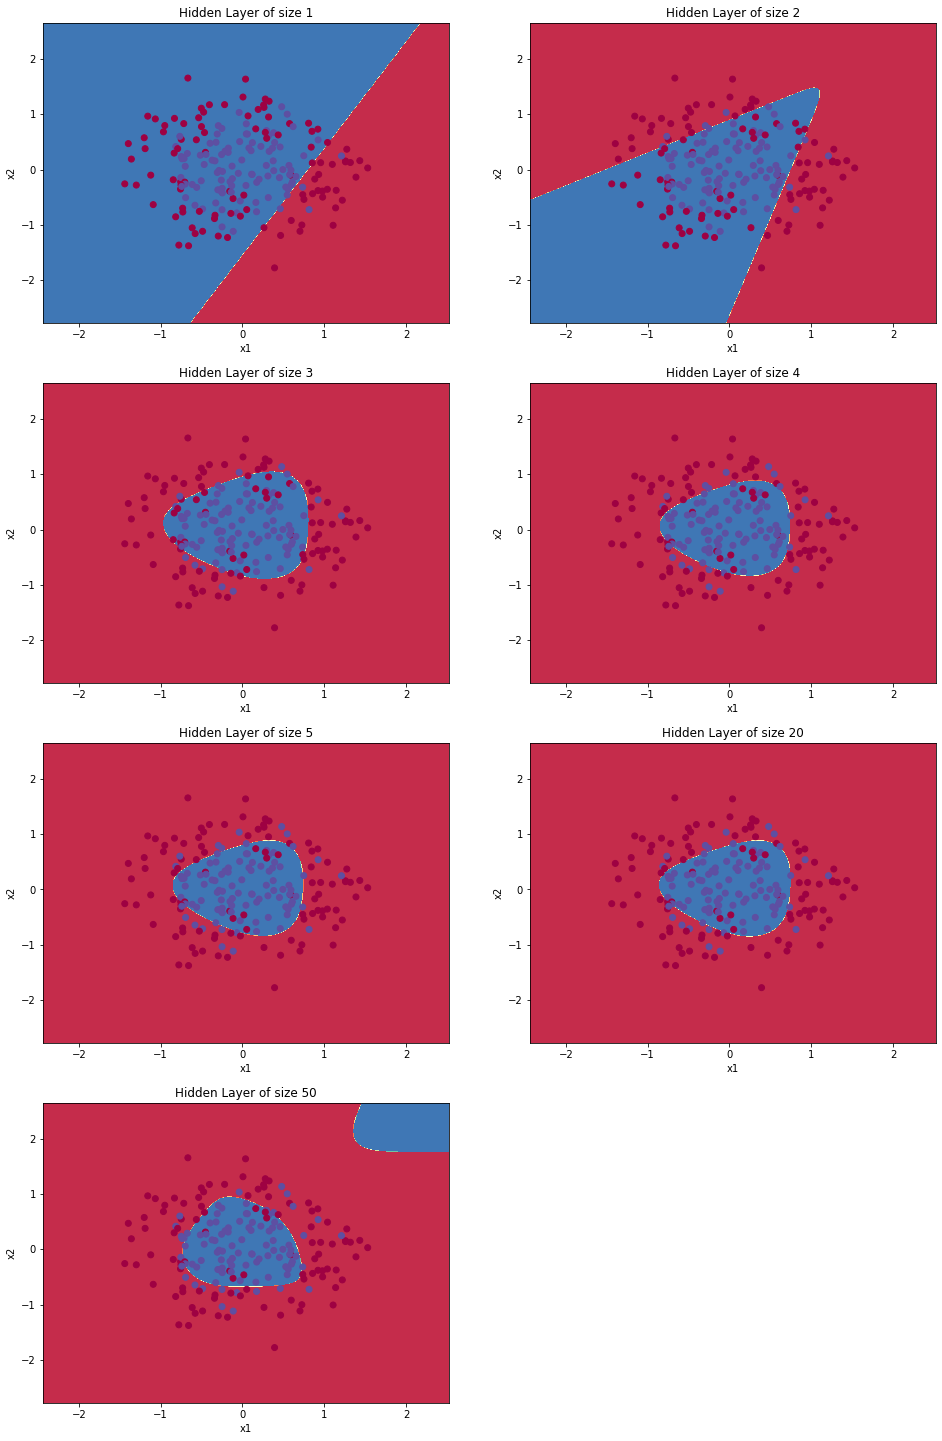

In [31]:
# Tuning hidden layer size

plt.figure(figsize = (16, 32));
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50];
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1);
    plt.title('Hidden Layer of size %d' %n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000);
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
    predictions = predict(parameters, X);
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100);
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

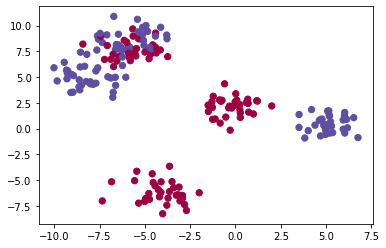

In [32]:
### START CODE HERE ### (choose your dataset)
dataset = "blobs"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral);

Cost after iteraion 0: 0.693147


Text(0.5, 1.0, 'Decision Boundary for hideen layer size 4')

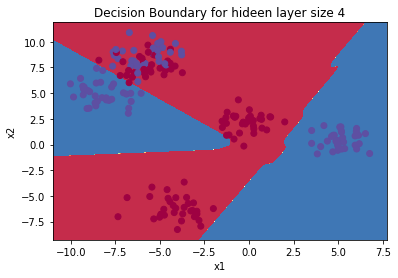

In [33]:
#Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 5, num_iterations = 1000, print_cost=True);

#Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
plt.title("Decision Boundary for hideen layer size " + str(4))  

In [ ]:
# Tuning hidden layer size

plt.figure(figsize = (16, 32));
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50];
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1);
    plt.title('Hidden Layer of size %d' %n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000);
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y);
    predictions = predict(parameters, X);
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100);
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 67.0 %
Accuracy for 2 hidden units: 67.0 %
Accuracy for 3 hidden units: 67.0 %
Accuracy for 4 hidden units: 82.0 %
Accuracy for 5 hidden units: 82.5 %
Accuracy for 20 hidden units: 91.0 %
